<a href="https://colab.research.google.com/github/markustoivonen/AIHealthTech2020/blob/master/exercises/gradient_descent_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to gradient descent

Consider you are given a function $f(\cdot)$, a single point $x$, and a task to move the point such that you decrease the value of the function at $f(x)$. The question is: how does one proceed to modify the $x$ such that the value $f(x)$ decreases?

One possible avenue is to recall the tools in calculus. Namely *the dervivative* for scalar $x$, and *the gradient* for vector $\boldsymbol{x}$. In this tutorial we only consider functions $f: \mathbb{R}^n \rightarrow \mathbb{R}$, where $n \ge 1$. For vector output, we could utilize the Jacobian, but that is out of the scope for now.

Let's start with a simple example using the function: $f(x) = x^2$.
The derivative gives us information of the direction where the function increases. For our function, the direction is: $\frac{d f(x)}{dx} = \frac{d x^2}{dx} = 2x$. This means that if we take a small step (small value $\alpha$) $\hat{x} = x + \alpha\frac{d x^2}{dx} = x + 2\alpha x$, the function evaluated at the new point $\hat{x}$ will have a larger value than when evaluated in the original point $x$.

Now we want to **minimize** the value of $f(x)$. Thus, we want to move to the opposite direction of where the function will increase, the direction of the *negative gradient* or *negative derivative*. This results in an algorithm called **gradient descent**. The gradient descent iteratively finds a better $x$ such that the value of the function being minimized decreases. The update equation for iteration $k+1$ is given by: 

$x_{k+1} = x_k - \alpha\frac{d f(x_k)}{d x}$

For the square as our function, initial position $x_0 = 1$, and a step-size $\alpha = 0.1$ one iteration is thus:

\begin{align}
x_1 &= x_0 - 2\alpha x_0\\
&= 1 - 2*0.1*1 \\
&= 0.8
\end{align}
We can check if one iteration has found a better solution than our initial quess:
\begin{align}
f(x_0) &= 1^2 = 1\\
f(x_1) &= 0.8^2 = 0.64\\
\rightarrow f(x_1) &< f(x_0)
\end{align}
Indeed, we have found a better point $x$ which produces a smaller value for the function. One can easily verify that the second iteration produces $x_2 = 0.64, f(0.64) = 0.4096‬$, $x_3 = 0.512, f(0.512) = 0.262144‬$, and so on. If the step-size $\alpha$ is decayed, we will eventually reach a local minima of $f$.

One aspect we have not yet considered is the selection of the *step-size* parameter $\alpha$. This is often left for the user to determine and especially in the deep learning community, the selection of the step-size is considered an art. Too large $\alpha$ and we might actually end up in a worse position than our initial one, and too small step-size will result in too many iterations costing us time and computational resources.

**It should be noted** that sometimes you might want to maximize a function, in which case the gradient is not subtracted but added. This algorithm is called **gradient ascent**. Usually we deal with "loss functions" which we want to minimize and objective functions which we want to maximize. The notation varies though, so the reader should pay attention if we are minimizing or maximizing something.


# a) Scalar case

Look at the function "f(x)" below. Your task is to find the derivative of the function with respect to the input. Then modify the "df_dx" which denotes $df/dx$ such that it returns the derivative. Finally modify the "gradient_descent_step" function such that it will perform the gradient descent step and return $x_{k+1}$, which is the new point for $x$ which should be closer to the minimum.

The function is defined as:

\begin{align*}
f(x) &= \frac{x^2}{1+e^{-x}}\\
&= \frac{1}{1+e^{-x}}x^2
\end{align*}
The last form is a hint for perhaps easier form if you remember the last exercise session.

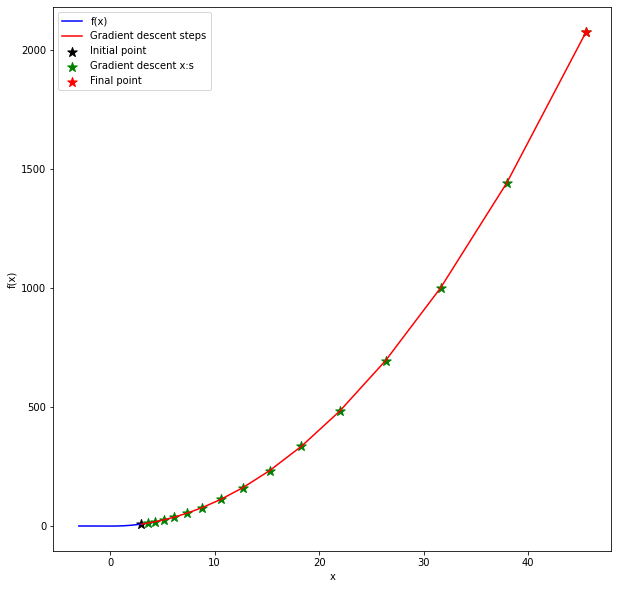

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1.0/(1+np.exp(-x))*x**2

def df_dx(x):
    derivative = ((2*x*(1-np.exp(-x))) - x**2*np.exp(-x)) / (1-np.exp(-x))**2
    return derivative

def gradient_descent_step(x_k,alpha):
    # x_k is the current position
    # alpha is the step-size, i.e. learning rate
    x_k_plus_1 = x_k + alpha*df_dx(x_k)
    return x_k_plus_1

# Make some points for visualising the function:
visualization_points = np.linspace(-3,3,1000)

# Make an initial quess for the value:
x_0 = 3.0
# Decide for a step-size:
alpha = 0.1

# Decide the number of steps you want to take until you stop iterating:
number_of_steps = 15

# Now start to optimize:
# For visualization purposes, let's keep track of our x:s and f(x):s
x_history = [x_0]
f_history = [f(x_0)]
current_x = x_0

for iteration in range(number_of_steps):
    # Make a better quess for x by gradient descent:
    new_x = gradient_descent_step(current_x, alpha)
    # Record:
    x_history.append(new_x)
    f_history.append(f(new_x))
    # Set the new x as the current position:
    current_x = new_x

# Visualization:
# Visualize the function:
plt.figure(figsize=(10,10))
plt.plot(visualization_points,f(visualization_points),color='blue',label='f(x)')
plt.plot(x_history,f_history,color='red',label='Gradient descent steps')
plt.scatter(x_0,f(x_0),label='Initial point',marker='*',s=100,color='black')
plt.scatter(x_history[1:],f_history[1:],label='Gradient descent x:s',marker='*',s=100,color='green')
plt.scatter(x_history[-1],f_history[-1],label='Final point',marker='*',s=100,color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


# b) Vector case

In the case of vector $\boldsymbol{x} = [x_1,x_2,\dots,x_d]^\top \in \mathbb{R}^d$ and function $f(\cdot): \mathbb{R}^d \rightarrow \mathbb{R}$, we need to compute the gradient. The gradient convention is often as follows:

\begin{align*}
\nabla_\boldsymbol{x}f(\boldsymbol{x}) &= [\frac{df(x)}{dx_1},\frac{df(x)}{dx_2},\dots,\frac{df(x)}{dx_d} ]^\top
\end{align*}

The update equation is similar to the scalar case:
$\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \alpha\nabla_\boldsymbol{x}f(\boldsymbol{x})$
Notice that we have used here the column vector convention. You can implement the algorithm using any convention you like, as long as it performs the same update.

In this task you are to implement the gradient of a simple function with 2-dimensional $\boldsymbol{x}$ in "df_dx", and use the gradient to find the minima of the function in the "gradient_descent_step". The notation of the functions is the same as in the previous task.

The function is defined as $x^\top M x$:
\begin{align*}
f(\boldsymbol{x}) = [x_1, x_2]\begin{bmatrix}
1 & -0.5 \\
-0.7 & 1 
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 
\end{bmatrix}
\end{align*}

You can do 2 things: either compute the terms of the gradient individually, or compute them at once using matrices and vectors: https://en.wikipedia.org/wiki/Matrix_calculus#Scalar-by-vector_identities

#Notes
In the figure, the darker the color, the smaller the value of the function is, so the gradient descent should stop in the middle of the dark area. Notice that the matrix is not symmetric.

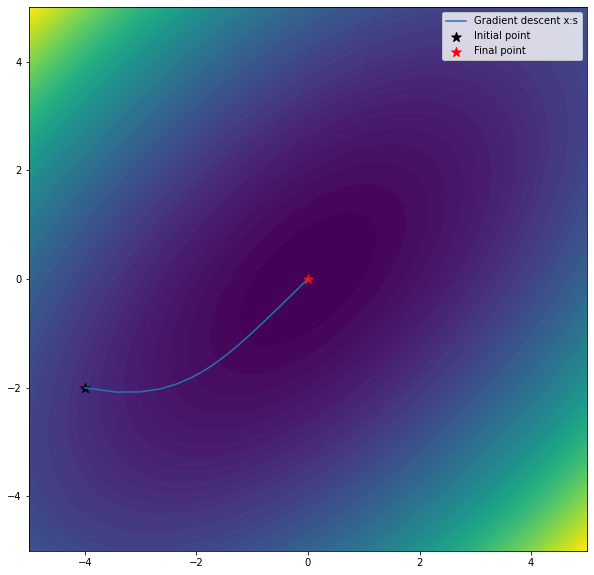

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

def f(x):
    mat = np.array([[1,-0.5],[-0.7,1]])
    return x.T@mat@x

def df_dx(x):
    # Calculate the elements one-by-one or by matrix calculus
    A = np.array([[1,-0.5],[-0.7,1]])
    gradient = (A+A.T)@x
    return gradient

def gradient_descent_step(x_k,alpha):
    # x_k is the current position
    # alpha is the step-size, i.e. learning rate
    x_k_plus_1 = x_k - alpha*df_dx(x_k)
    return x_k_plus_1

# Make an initial quess for the value:
x_0 = np.array([[-4],[-2]])
# Decide for a step-size:
alpha = 0.1

# Decide the number of steps you want to take until you stop iterating:
number_of_steps = 100

# Now start to optimize:
# For visualization purposes, let's keep track of our x:s and f(x):s
x_history = [x_0]
current_x = x_0

for iteration in range(number_of_steps):
    # Make a better quess for x by gradient descent:
    new_x = gradient_descent_step(current_x, alpha)
    # Record:
    x_history.append(new_x)
    # Set the new x as the current position:
    current_x = new_x

# Visualization:
x_history = np.array(x_history)
# Visualize the function:
plt.figure(figsize=(10,10))
xmesh,ymesh = np.meshgrid(np.linspace(-5,5),np.linspace(-5,5))
n1,n2 = xmesh.shape
xmesh_vec = np.reshape(xmesh,(n1*n2,1))
ymesh_vec = np.reshape(ymesh,(n1*n2,1))
asmat = np.concatenate([xmesh_vec,ymesh_vec],1)
z = np.array([f(item) for item in asmat])
z = np.reshape(z,(n1,n2))
norm = cm.colors.Normalize(vmax=z.max(), vmin=0)
plt.contourf(xmesh,ymesh,z, 80, norm=norm)

# Visualize the found trajectory (this needs to be last so that the contourf does not write over it)
plt.plot(x_history[:,0],x_history[:,1],label='Gradient descent x:s')
plt.scatter(x_history[0,0],x_history[0,1],label='Initial point',marker='*',s=100,color='black')
plt.scatter(x_history[-1,0],x_history[-1,1],label='Final point',marker='*',s=100,color='red')
plt.legend()
plt.show()
